<a href="https://colab.research.google.com/github/Ngash12/ENC221-0078-2020/blob/main/Copy_of_ENC221_0078_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from scipy.spatial import cKDTree
import numpy as np


In [ ]:
TB_data = pd.read_excel("/content/drive/MyDrive/lewis/cg-data.xlsx")
TB_data.head()

,id,ident,latitude_deg,longitude_deg,country_name,iso_country,score,last_updated
0,2868,FCBB,-4.25170,15.253000,Republic of the Congo,CG,750,2008-06-13T14:30:04+00:00
1,2871,FCPP,-4.81603,11.886600,Republic of the Congo,CG,750,2021-01-27T10:27:07+00:00
2,30920,FCPL,-4.20635,12.659900,Republic of the Congo,CG,500,2012-12-15T10:39:06+00:00
3,2870,FCOU,1.61599,16.037901,Republic of the Congo,CG,250,2014-03-27T11:19:29+00:00
4,2869,FCOO,-0.53135,15.950100,Republic of the Congo,CG,250,2008-12-19T20:05:25+00:00


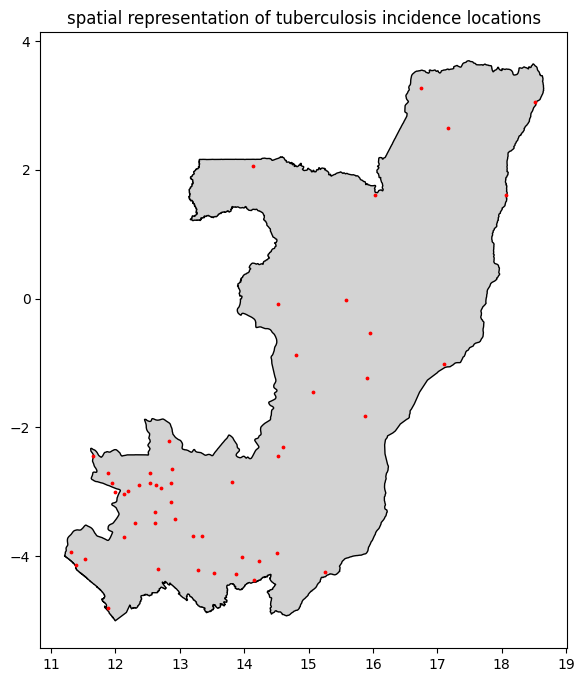

In [ ]:
#import cotedivoire country shapefile
congo = gpd.read_file("/content/drive/MyDrive/lewis/cog_admbnda_adm0_gaul_20190617.shp")
# Plot the shapefile
congo.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))
x = TB_data['longitude_deg']
y = TB_data['latitude_deg']
plt.title("spatial representation of tuberculosis incidence locations")
plt.scatter(x, y, color='red', s=3, alpha=1)

Mean Center Coordinates:
Longitude: 13.75431793515749
Latitude: -2.3464973389175934


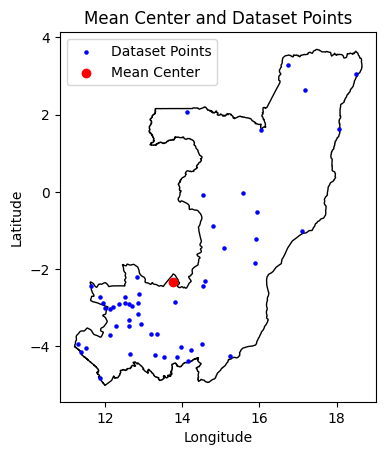

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming TB_data is your GeoDataFrame with longitude and latitude columns
x = TB_data['longitude_deg']
y = TB_data['latitude_deg']

# Calculate the mean center
mean_x = np.mean(x)
mean_y = np.mean(y)

print("Mean Center Coordinates:")
print("Longitude:", mean_x)
print("Latitude:", mean_y)

# Create a GeoDataFrame
mean_center = gpd.GeoDataFrame(geometry=gpd.points_from_xy([mean_x], [mean_y]), crs="EPSG:4326")

# Assuming cotedivoire is your GeoDataFrame for the country shapefile
congo.plot(color='white', edgecolor='black')

# Plot the dataset points with reduced size
plt.scatter(x, y, color='blue', label='Dataset Points', s=5)

# Plot the mean center as a dot
plt.scatter(mean_x, mean_y, color='red', label='Mean Center', zorder=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Center and Dataset Points')
plt.legend()
plt.show()


<ipython-input-24-484a4ee08e4a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap="YlOrBr", shade=True, bw_adjust=0.5)


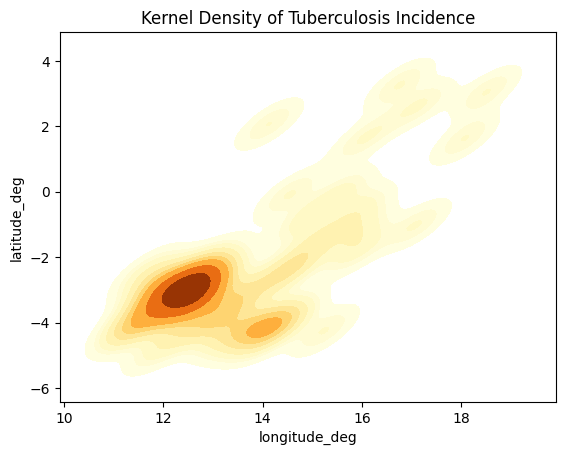

In [ ]:
import seaborn as sns

# Assuming x and y are your longitude and latitude coordinates
sns.kdeplot(x=x, y=y, cmap="YlOrBr", shade=True, bw_adjust=0.5)
plt.title("Kernel Density of Tuberculosis Incidence")
plt.xlabel("longitude_deg")
plt.ylabel("latitude_deg")
plt.show()
